In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import multiprocessing as mp
import seaborn as sns

In [168]:
def term(m1,m2,s1,r1,n):
    if n==2:
        return 1
    else:
        frac=(m1-s1+n-2)/(m1+n-2)*(m2-r1+n-2)/(m2+n-2)
        return term(m1,m2,s1,r1,n-1)*frac

def f(m1,m2,s1,r1,n):
    return (n*(n-1)**2)*(s1+1)/((m1+n)*(m1+n-1)*(m2+n-1))*term(m1,m2,s1,r1,n)

In [206]:
#probabilities
p1=0.2
p2=1-p1

In [184]:
def g(args):
    m1,m2,n=args
    if n==1:
        return max(p1,p2)
    else:
        t=0
        for r in range(m2+1):
            for s in range(r+1,m1+1):
                t+=f(m1,m2,s,r,n)*p1
        for s in range(m1+1):
            for r in range(s,m2+1):
                t+=f(m2,m1,r,s,n)*p2

        return t

In [207]:
data={}
ms=[2,5,10,50,100,200,500]
for m in ms:
    m1=int(m*p1)
    m2=m-m1
    with mp.Pool(mp.cpu_count()) as pool:
        result=pool.map(g,[(m1,m2,n) for n in range(1,200)])
    data[m]=result

In [93]:
sns.set()

In [202]:
df=pd.DataFrame.from_dict(data)

In [208]:
df2=pd.DataFrame.from_dict(data)

In [203]:
df['n']=df.index+1

In [209]:
df2['n']=df2.index+1

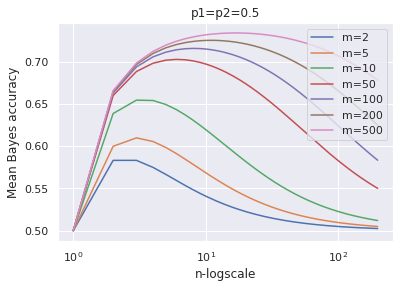

In [228]:
for m in ms:
    sns.lineplot(data=df,x='n',y=m,label='m={}'.format(m))
    plt.legend(loc='upper right')
    plt.ylabel('Mean Bayes accuracy')
    plt.xlabel('n-logscale')
    plt.title('p1=p2=0.5')
    plt.xscale('log')
plt.savefig('p105p205.png')

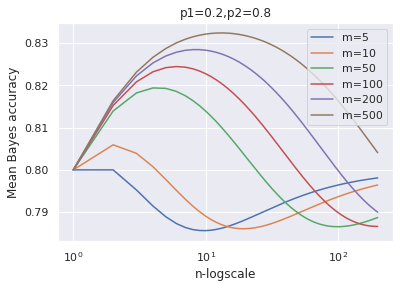

In [230]:
for m in ms[1:]:
    sns.lineplot(data=df2,x='n',y=m,label='m={}'.format(m))
    plt.legend(loc='upper right')
    plt.ylabel('Mean Bayes accuracy')
    plt.xlabel('n-logscale')
    plt.title('p1=0.2,p2=0.8')
    plt.xscale('log')
plt.savefig('p102p208.png')

In [233]:
df[200].values.argmax()

10